# 1 - Beginner - Plot Spectra and Albedos from SMARTS

##### Generate & Plot Spectra and Albedos from SMARTS
###### &ensp;&ensp;&ensp;&ensp; * 1. DNI and DHI for a particular time and location
###### &ensp;&ensp;&ensp;&ensp; * 2. Ground Albedo for various materials at AM 1.5
###### &ensp;&ensp;&ensp;&ensp; * 3. Ground Albedo for complete AOD and PWD Weather Data


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import pvlib
import datetime
import pprint
import os

In [2]:
plt.rcParams['timezone'] = 'Etc/GMT+7'
font = {'family' : 'DejaVu Sans',
'weight' : 'normal',
'size'   : 18}
plt.rc('font', **font)
plt.rcParams['figure.figsize'] = (12, 5)


In [3]:
import pySMARTS

In [4]:
pySMARTS.__version__

''

#### Real Input data from SRRL for OCTOBER 21st, 12:45 PM

# 1. Plot a DNI and DHI for a particular time and location


In [22]:
IOUT = '2 3' # DNI and DHI

In [21]:
YEAR = '2021'
MONTH = '06'
DAY = '21'
HOUR = '12'
LATIT = '33'
LONGIT = '110'
ALTIT = '0.9' # km above sea level
ZONE = '-7' # Timezone

Could not find SMARTS2 executable.


In [ ]:
pySMARTS.SMARTSTimeLocation(IOUT,YEAR,MONTH,DAY,HOUR, LATIT, LONGIT, ALTIT, ZONE)


# 2. Plot Albedos from SMARTS

In [16]:
IOUT = '30' # Albedo

#### Plot Ground Albedo AM 1.0

In [ ]:
materials = ['Concrete', 'LiteLoam', 'RConcrte', 'Gravel']

alb_db = pd.DataFrame()

for i in range (0, len(materials)):

    alb = pySMARTS.SMARTSAirMass(IOUT=IOUT, AMASS='1.5', material=materials[i])

    alb_db[materials[i]] = alb[alb.keys()[1]]
    
alb_db.index = alb.Wvlgth

alb_db_10 = alb_db

for col in alb_db:
    alb_db[col].plot(legend=True)
    
plt.xlabel('Wavelength [nm]')
plt.xlim([300, 2500])
plt.axhline(y=0.084, color='r')
plt.axhline(y=0.10, color='r')

#UV albedo: 295 to 385
#Total albedo: 300 to 3000
#10.4 and 8.4 $ Measured
#References

plt.ylim([0,1])
plt.ylabel('Reflectance')
plt.legend(bbox_to_anchor=(1.04,0.75), loc="upper left")
plt.title('Ground albedos AM 1')
plt.show()

vis=alb_db.iloc[40:1801].mean()
uv=alb_db.iloc[30:210].mean()

print(vis)
print(uv)

## Extra: Averaging Albedos for Visible and UV


In [ ]:
vis=alb_db.iloc[40:1801].mean()
uv=alb_db.iloc[30:210].mean()
print("Albedo on Visible Range:\n", vis)
print("Albedo on UV Range:\n", uv)

<div class="alert alert-block alert-info"><b>Tip: </b> If you want full spectrum averages, we recommend interpolating as the default granularity of SMARTS at higher wavelengths is not the same than at lower wavelengths, thus the 'step' is not the same. </div>


In [68]:
r = pd.RangeIndex(2800,40000, 5)
r = r/10
alb2 = alb_db.reindex(r, method='ffill')
print("Albedo for all wavelengths:", alb2.mean())

In [74]:
# FYI: Wavelengths corresponding to the albedo before and after interpolating
"""
# Visible
alb_db.iloc[40] # 300
alb_db.iloc[1801] # 3000

# UV
alb_db.iloc[30] # 295
alb_db.iloc[210] # 385        

# Visible
alb2.iloc[40] # 300
alb2.iloc[5440] # 3000

# UV
alb2.iloc[30] # 295
alb2.iloc[210] # 385   
"""

# 3. ADVANCED: Plot Ground Albedo for More Complete Weather Data

#### This asumes you know a lot more parameters about your weather data souch as: Broadband Turbidity, Aeorsol Opticla Density parameters, and Precipitable Water. 


###  Real Input data from SRRL for OCTOBER 21st, 12:45 PM

In [7]:
alb = 0.2205
YEAR='2020'; MONTH='10'; DAY='21'; HOUR = '12.75' 
LATIT='39.74'; LONGIT='-105.17'; ALTIT='1.0'; ZONE='-7'
TILT='33.0';  WAZIM='180.0'; HEIGHT='0' 
material='DryGrass'
min_wvl='280'; Max_wvl='4000'

TAIR = '20.3'
RH = '2.138'
SEASON = 'WINTER'
TDAY = '12.78'
SPR = '810.406'
RHOG = '0.2205'

WAZIMtracker = '270'
TILTtracker = '23.37'
tracker_tetha_bifrad = '-23.37'

TAU5='0.18422'     # SRRL-GRAL "Broadband Turbidity"
TAU5 = '0.037'    # SRRL-AOD [500nm]
GG = '0.7417'     # SSRL-AOD Asymmetry [500nm]
BETA = '0.0309'   # SRRL-AOD Beta
ALPHA = '0.1949'  # SRRL-AOD Alpha [Angstrom exp]
OMEGL = '0.9802'  # SRRL-AOD SSA [500nm]
W = str(7.9/10)   # SRRL-PWD  Precipitable Water [mm]

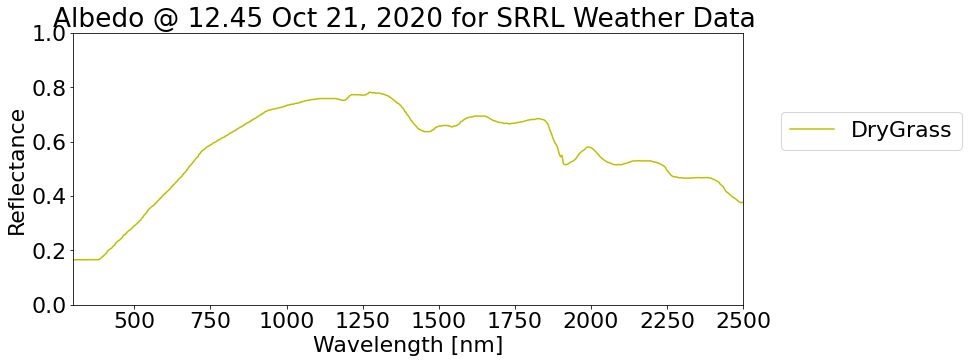

In [8]:
material = 'DryGrass'

alb_db = pd.DataFrame()

alb = pySMARTS.SMARTSSRRL(
    IOUT=IOUT, YEAR=YEAR, MONTH=MONTH,DAY=DAY, HOUR='12.45', LATIT=LATIT, 
    LONGIT=LONGIT, ALTIT=ALTIT, 
    ZONE=ZONE, W=W, RH=RH, TAIR=TAIR, 
    SEASON=SEASON, TDAY=TDAY, TAU5=None, SPR=SPR, 
    TILT=TILT, WAZIM=WAZIM,
    ALPHA1 = ALPHA, ALPHA2 = 0, OMEGL = OMEGL,
    GG = GG, BETA = BETA,
    RHOG=RHOG, HEIGHT=HEIGHT, material=material, POA = True)

alb_db[material] = alb[alb.keys()[1]]   
alb_db.index = alb.Wvlgth


In [ ]:
alb_db[material].plot(legend=True, color='y')
plt.xlabel('Wavelength [nm]')
plt.xlim([300, 2500])
plt.ylim([0,1])
plt.ylabel('Reflectance')
plt.legend(bbox_to_anchor=(1.04,0.75), loc="upper left")
plt.title('Albedo @ 12.45 Oct 21, 2020 for SRRL Weather Data ')
plt.show()


### A plotly plot to explore the results

In [24]:
import plotly.express as px

In [ ]:
fig = px.line(alb_db[material], title='Albedo @ 12.45 Oct 21, 2020 for SRRL Weather Data')

fig.update_layout(xaxis_title='Wavelength [nm]',
                  yaxis_title='Reflectance')
fig.show()
